In [1]:
from IPython.display import SVG, display
import svgwrite as sw

In [2]:
# Get points from room description
r1 = "POLYGON((-7550.86349757 5556.40843218, -7550.86349757 1656.40843218, -4960.86349757 1656.40843218, -2780.86349757 1656.40843218, -2780.86349757 2506.40843218, -2780.86349757 5556.40843218, -7550.86349757 5556.40843218))"
r2 = "POLYGON((3639.13650243 5556.40843218, -860.863497573 5556.40843218, -860.863497573 2506.40843218, -860.863497573 1056.40843218, -783.093897573 1056.40843218, 139.136502427 1056.40843218, 3639.13650243 1056.40843218, 3639.13650243 5556.40843218))"

In [18]:
# Parse the result
def parser(result):
    return [
            tuple(float(x) for x in r.strip().split(' '))
            for r in result[9:-2].split(',')
           ]

room1 = parser(r1)
room2 = parser(r2)

In [19]:
# Define constants for drawing
SHEET_SIZE = 500
DRAW_SIZE = 300
offset = int((SHEET_SIZE - DRAW_SIZE) / 2)

In [20]:
points = room1 + room2
xpts, ypts = zip(*points)

min_x = min(xpts)
min_y = min(ypts)
range_x = max(xpts) - min_x
range_y = max(ypts) - min_y


# Normalise polygon dimensions to get in draw_size
# All values must be positives
def get_path(points, min_x, min_y, range_x, range_y):
    return [
        (
            (p[0] - min_x) / range_x * DRAW_SIZE,
            (p[1] - min_y) / range_y * DRAW_SIZE
        )
        for p in points
    ]

# Add offset to get picture in middle of sheet
def add_offset(points, x_offset, y_offset):
    return [
        (
            p[0] + x_offset,
            p[1] + y_offset
        )
        for p in points
    ]

In [21]:
path1 = get_path(room1, min_x, min_y, range_x, range_y)
path2 = get_path(room2, min_x, min_y, range_x, range_y)

path1 = add_offset(path1, offset, offset)
path2 = add_offset(path2, offset, offset)

In [22]:
drw_params = {'fill': "white", 'fill-opacity': 0}
drw = sw.Drawing('test.svg',size=(SHEET_SIZE, SHEET_SIZE))
drw.add(drw.polygon(path1, stroke="black", **drw_params))
drw.add(drw.polygon(path2, stroke="red", **drw_params))

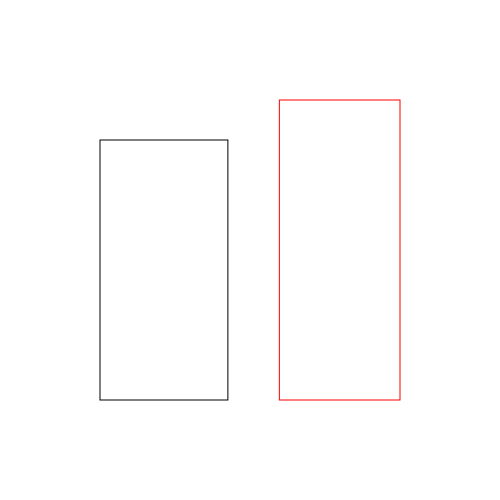

In [23]:
display(SVG(drw.tostring()))